In [1]:
"""
The Mandelbrot set is the set of complex numbers "c" for which the series
"z_(n+1) = z_n * z_n + c" does not diverge, i.e. remains bounded. Thus, a
complex number "c" is a member of the Mandelbrot set if, when starting with
"z_0 = 0" and applying the iteration repeatedly, the absolute value of
"z_n" remains bounded for all "n > 0". Complex numbers can be written as
"a + b*i": "a" is the real component, usually drawn on the x-axis, and "b*i"
is the imaginary component, usually drawn on the y-axis. Most visualizations
of the Mandelbrot set use a color-coding to indicate after how many steps in
the series the numbers outside the set diverge. Images of the Mandelbrot set
exhibit an elaborate and infinitely complicated boundary that reveals
progressively ever-finer recursive detail at increasing magnifications, making
the boundary of the Mandelbrot set a fractal curve.
(description adapted from https://en.wikipedia.org/wiki/Mandelbrot_set )
(see also https://en.wikipedia.org/wiki/Plotting_algorithms_for_the_Mandelbrot_set )
"""


import colorsys

from PIL import Image  # type: ignore


def get_distance(x: float, y: float, max_step: int) -> float:
    """
    Return the relative distance (= step/max_step) after which the complex number
    constituted by this x-y-pair diverges. Members of the Mandelbrot set do not
    diverge so their distance is 1.

    >>> get_distance(0, 0, 50)
    1.0
    >>> get_distance(0.5, 0.5, 50)
    0.061224489795918366
    >>> get_distance(2, 0, 50)
    0.0
    """
    a = x
    b = y
    for step in range(max_step):  # noqa: B007
        a_new = a * a - b * b + x
        b = 2 * a * b + y
        a = a_new

        # divergence happens for all complex number with an absolute value
        # greater than 4
        if a * a + b * b > 4:
            break
    return step / (max_step - 1)


def get_black_and_white_rgb(distance: float) -> tuple:
    """
    Black&white color-coding that ignores the relative distance. The Mandelbrot
    set is black, everything else is white.

    >>> get_black_and_white_rgb(0)
    (255, 255, 255)
    >>> get_black_and_white_rgb(0.5)
    (255, 255, 255)
    >>> get_black_and_white_rgb(1)
    (0, 0, 0)
    """
    if distance == 1:
        return (0, 0, 0)
    else:
        return (255, 255, 255)


def get_color_coded_rgb(distance: float) -> tuple:
    """
    Color-coding taking the relative distance into account. The Mandelbrot set
    is black.

    >>> get_color_coded_rgb(0)
    (255, 0, 0)
    >>> get_color_coded_rgb(0.5)
    (0, 255, 255)
    >>> get_color_coded_rgb(1)
    (0, 0, 0)
    """
    if distance == 1:
        return (0, 0, 0)
    else:
        return tuple(round(i * 255) for i in colorsys.hsv_to_rgb(distance, 1, 1))


def get_image(
    image_width: int = 800,
    image_height: int = 600,
    figure_center_x: float = -0.6,
    figure_center_y: float = 0,
    figure_width: float = 3.2,
    max_step: int = 50,
    use_distance_color_coding: bool = True,
) -> Image.Image:
    """
    Function to generate the image of the Mandelbrot set. Two types of coordinates
    are used: image-coordinates that refer to the pixels and figure-coordinates
    that refer to the complex numbers inside and outside the Mandelbrot set. The
    figure-coordinates in the arguments of this function determine which section
    of the Mandelbrot set is viewed. The main area of the Mandelbrot set is
    roughly between "-1.5 < x < 0.5" and "-1 < y < 1" in the figure-coordinates.

    Commenting out tests that slow down pytest...
    # 13.35s call     fractals/mandelbrot.py::mandelbrot.get_image
    # >>> get_image().load()[0,0]
    (255, 0, 0)
    # >>> get_image(use_distance_color_coding = False).load()[0,0]
    (255, 255, 255)
    """
    img = Image.new("RGB", (image_width, image_height))
    pixels = img.load()

    # loop through the image-coordinates
    for image_x in range(image_width):
        for image_y in range(image_height):
            # determine the figure-coordinates based on the image-coordinates
            figure_height = figure_width / image_width * image_height
            figure_x = figure_center_x + (image_x / image_width - 0.5) * figure_width
            figure_y = figure_center_y + (image_y / image_height - 0.5) * figure_height

            distance = get_distance(figure_x, figure_y, max_step)

            # color the corresponding pixel based on the selected coloring-function
            if use_distance_color_coding:
                pixels[image_x, image_y] = get_color_coded_rgb(distance)
            else:
                pixels[image_x, image_y] = get_black_and_white_rgb(distance)

    return img


if __name__ == "__main__":
    import doctest

    doctest.testmod()

    # colored version, full figure
    img = get_image()

    # uncomment for colored version, different section, zoomed in
    # img = get_image(figure_center_x = -0.6, figure_center_y = -0.4,
    # figure_width = 0.8)

    # uncomment for black and white version, full figure
    # img = get_image(use_distance_color_coding = False)

    # uncomment to save the image
    # img.save("mandelbrot.png")

    img.show()


In [3]:
get_distance(0,0,50)

1.0

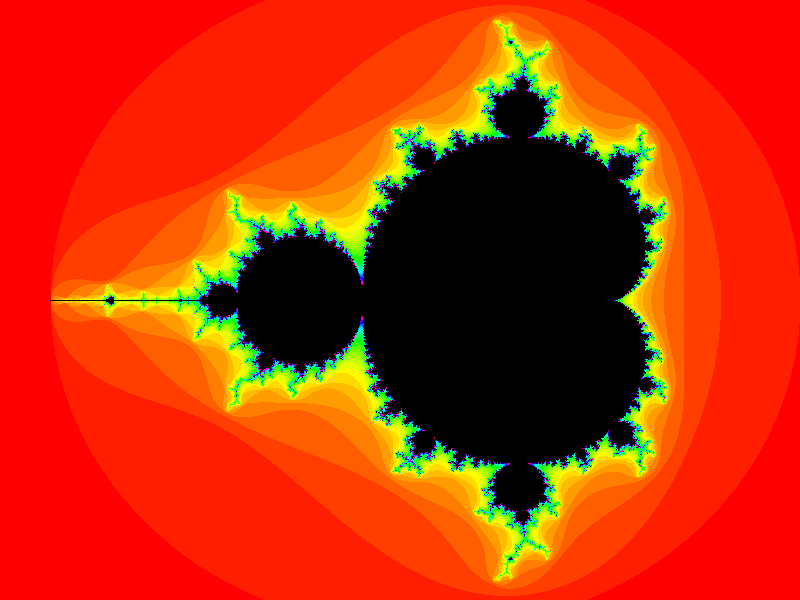

In [5]:
get_image()